## TASCA M06 T01

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
title=['crim', 'zn', 'indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv']
house = pd.read_csv(r"C:\Users\34626\Documents\TRABAJO\TALENTO DIGITAL\DATA SCIENCE-BARCELONA ACTIVA\SPRINT 5.- INTRODUCCIÓ AL TEST D'HIPÒTESIS\housing data.csv",
sep=',', encoding = 'ISO-8859-1', names=title)

house

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


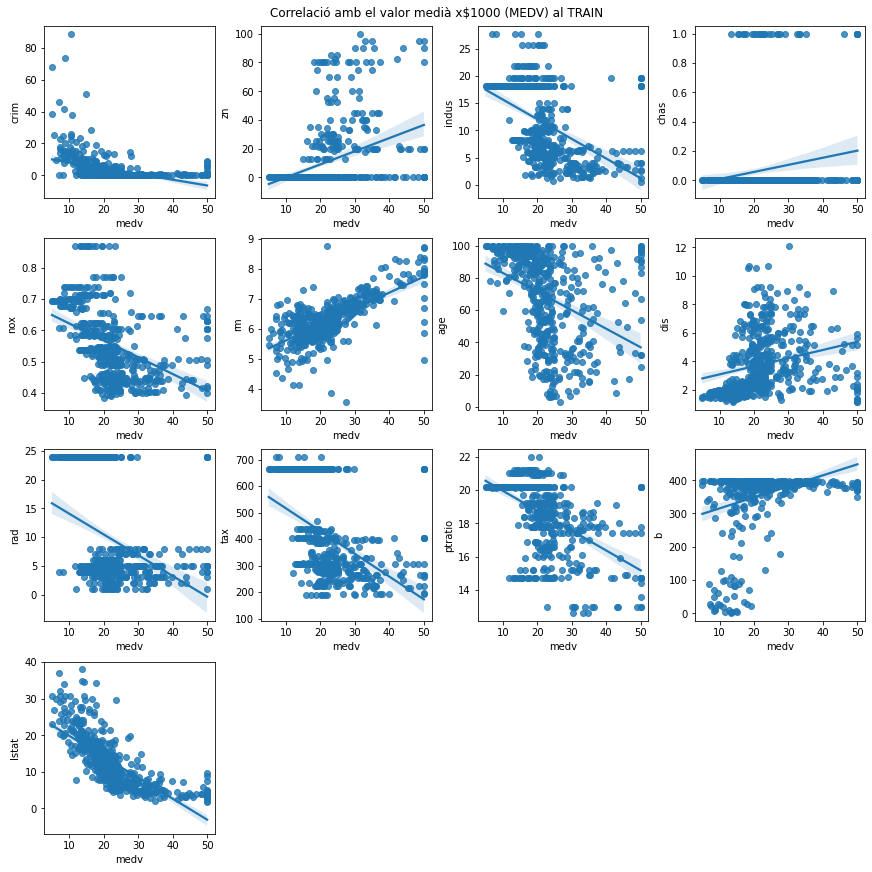

In [5]:
# El dataset ja està revisat d'anteriors exercicis i no falten dades.
# Com a feina previa de revisió de les dades, fem gràfics de correlació amb la variable dependent MEDV de totes les variables 
# independents per tenir una idea general del seu comportament
col=house.drop('medv',axis='columns').columns

fig,axs =plt.subplots(4,4, figsize=(12,12),layout='constrained')
axs=axs.flat
fig.suptitle('Correlació amb el valor medià x$1000 (MEDV) al TRAIN')

for count,elem in enumerate(col):
    sns.regplot(
        data = house,
        x    = 'medv',
        y    = elem,
        ax   = axs[count])

# Per borrar els axes que estan buits (fas la llista sobre la que itera la i)
for i in [13,14,15]:
    fig.delaxes(axs[i])

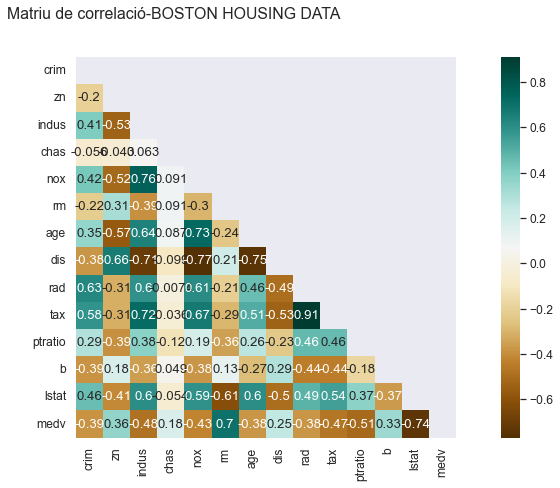

In [13]:
# Correlació entre variables als 2 datasets
corr=house.corr()

fig,axs =plt.subplots(figsize=(16,7))
sns.set(font_scale=1.1)
fig.suptitle('Matriu de correlació-BOSTON HOUSING DATA')

mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='BrBG')

plt.show()

In [ ]:
# Es veu que algunes variables están força correlacionades amb altres, com indus o dis

In [3]:
from sklearn.model_selection import train_test_split # per separar en training-test

# Separo el dataset en 2 parts per poder entrenar i validar els models posterioment

X_train, X_test, y_train, y_test=train_test_split(
                                        house.drop('medv', axis='columns'),
                                        house['medv'],
                                        test_size=0.2,
                                        random_state=15
                                        )

In [ ]:
# Podria normalitzar la regressió directament al model, però millor fer-ho abans per així escollir quines normalitzes i quines
#no. Per exemple aquest dataset té variables binomials que no s'haurien de normalitzar

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


# Determino que s'ha de fer a cada columna
lista1=['crim','zn','indus','nox','rm','age','dis','rad','tax','ptratio','b','lstat']



preprocessor= ColumnTransformer(
                [('scale', StandardScaler(), lista1)],
                 remainder='passthrough') # Per a que no faci res en les columnes no anomenades

In [6]:
# Ara apliquem els mètodes fit i transformació a les dades d'entrenament
X_train_prep= preprocessor.fit_transform(X_train)
# I després la transformació al test 
X_test_prep= preprocessor.transform(X_test)
#Convertir-o en dataframe
labels=lista1.append('chas')
X_train_prep=pd.DataFrame(X_train_prep, columns=labels)
X_test_prep=pd.DataFrame(X_test_prep, columns=labels)



## Exercici 1

In [9]:
# Voy a hacer una regresión linial mutlple, per que serveixi de
# Vaig a fer una regressió linial múltiple, per a que serveixi de comparació amb les altres, al ser la més senzilla

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train_prep
y_train

model1= LinearRegression()
model1.fit(X_train_prep, y_train)  # la X es fa sobre les variables normalitzades



LinearRegression()

In [10]:
# Faig una regressió linial amb el mètode RiDGE (l'escullo perquè veig que hi ha variables depenents entre si)

from sklearn.linear_model import Ridge
model2 = Ridge()
model2.fit(X_train_prep, y_train)

Ridge()

In [11]:
# Provo amb l'arbre de regressió Arbre de regresió

from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor()
model3.fit(X_train_prep, y_train)

DecisionTreeRegressor()

## Exercici 2

In [ ]:
# Comporació dels tres models en base a R2

In [20]:
r_sqLINIAL= model1.score(X_train_prep,y_train) # R2 MODEL REGRESSIÓ LINIAL MÚLTIPLE
r_sqLINIAL

0.7455344405641732

In [22]:
r_sqRIDGE= model2.score(X_train_prep,y_train) # R2 MODEL RIDGE
r_sqRIDGE

0.7455008654321963

In [29]:
r_sqTREE= model3.score(X_train_prep,y_train) # R2 MODEL ARBRE DE REGRESSIÓ
r_sqTREE

1.0

In [ ]:
# Comparació dels tres models en base MSE (MEAN SQUARE ERROR) I RMSE (ROOT MEAN SQUARE ERROR)

In [30]:
from sklearn.metrics import mean_squared_error  # moduls per fer els càlculs
import math

In [21]:
y_pred_lin = model1.predict(X_train_prep)  # Per fer la predicció del train amb el MODEL LINIAL i poder calcular el MSE

In [22]:
print(mean_squared_error(y_train, y_pred_lin))  # MSE REGRESSIÓ LINIAL MÚLTIPLE
print(math.sqrt(mean_squared_error(y_train, y_pred_lin)))

21.871593283838422
4.6767075260099835


In [27]:
y_pred_RIDGE = model2.predict(X_train_prep)  # Per fer la predicció del train amb el MODEL RIDGE

In [28]:
print(mean_squared_error(y_train, y_pred_RIDGE)) # MSE MODEL RIDGE
print(math.sqrt(mean_squared_error(y_train, y_pred_RIDGE)))

21.874479103171605
4.677016046922611


In [30]:
y_pred_Tree = model3.predict(X_train_prep) # Per fer la predicció del train amb el MODEL ARBRE DE REGRESSIÓ i poder calcular el MSE

In [31]:
print(mean_squared_error(y_train, y_pred_Tree))  # MSE MODEL ARBRE DE REGRESSIÓ
print(math.sqrt(mean_squared_error(y_train, y_pred_Tree)))

0.0
0.0


## Exercici 3

In [13]:
# Per a RIDGE, un dels principals hiperparàmetres és alfa
from sklearn.model_selection import GridSearchCV, RepeatedKFold

param_grid = {'alpha' : np.logspace(-5,3,10) }


grid = GridSearchCV(
            estimator  = Ridge(),
            param_grid = param_grid,
            scoring    = 'neg_root_mean_squared_error', 
            n_jobs     = 5,
            cv         = RepeatedKFold(n_splits = 5, n_repeats =5),
            return_train_score = True)

_=grid.fit(X= X_train_prep, y= y_train)

In [20]:
grid.best_params_

{'alpha': 2.154434690031882}

In [23]:
grid.best_score_ # Abans sense el alfa era 4,677

-4.906803038217355

In [24]:
grid.scoring

'neg_root_mean_squared_error'

In [ ]:
# Per al MODEL ARBRE DE REGRESSIÓ utilitzem 

In [16]:
param =  {'splitter'                     : ['best', 'random'],
          'max_depth'                    : [1, 3, 5, 7,9,11,12],
          'min_samples_leaf'             : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'max_features'                 : ['auto', 'log2', 'sqrt', None]}

In [17]:
gridT = GridSearchCV(
            estimator  = DecisionTreeRegressor(),
            param_grid = param,
            scoring    = 'neg_root_mean_squared_error',
            n_jobs     = 5,
            cv         = RepeatedKFold(n_splits = 5, n_repeats =5),
            return_train_score = True)

result=gridT.fit(X= X_train_prep, y= y_train)

In [18]:
gridT.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [19]:
gridT.best_score_   # Sense hiperparàmtres era 0

-3.924699444639757

In [20]:
gridT.scoring

'neg_root_mean_squared_error'

In [ ]:
# EL neg_root_mean_squared_error quan més alt en valor absolut millor

## Exercici 4

In [1]:
# Per fer el model, separarem primer el training test amb una cross-validation. Utilitzarem el mètode k-fold, asuint que les dates
# estan identicament distribuits i independents

In [ ]:
#Per a la regressió linial múltiple no hi ha hiperparàmetres, per tant l'estimator puc utilitzar el model directament

In [22]:
# Cross validation score utiliza kfold para regresión
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(
                    estimator = LinearRegression(),
                    X         = X_train_prep,
                    y         = y_train,
                    scoring   = 'neg_root_mean_squared_error',   #metrica para medir la distancia entre modelo y datos. Los valores más altos són mejores que los bajos 
                    cv        = 10)  # numero de veces que hace la cross validatrion

In [23]:
cv_scores.mean()

-4.8150259805016296

In [ ]:
# Per al MODEL RIDGE s'ha de afinar el model de les dades obtingudes amb els hiperparàmetres

In [24]:
model2H = Ridge(alpha = 2.154434690031882)
model2H.fit(X_train_prep, y_train)

Ridge(alpha=2.154434690031882)

In [27]:
# Emprant totes les dades amb Cross-validation
cv_scores_RidgeH = cross_val_score(
                    estimator = model2H,
                    X         = X_train_prep,
                    y         = y_train,
                    scoring   = 'neg_root_mean_squared_error',  
                    cv        = 10)  

In [28]:
cv_scores_RidgeH.mean()

-4.808048568866924

In [ ]:
# Emprant les dades train/test

In [31]:
y_pred_RIDGEH = model2H.predict(X_train_prep)
print(math.sqrt(mean_squared_error(y_train, y_pred_RIDGEH)))

4.678049008966733


In [ ]:
# Per al model ARBRE DE REGRESSIÓ

In [35]:
model3H = DecisionTreeRegressor(
                splitter         = 'best',
                max_features     = 'auto',
                min_samples_leaf = 1 , 
                max_depth        = 5 )
model3H.fit(X_train_prep, y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto')

In [36]:
# Emprant totes les dades amb Cross-validation
cv_scores_TreeH = cross_val_score(
                    estimator = model3H,
                    X         = X_train_prep,
                    y         = y_train,
                    scoring   = 'neg_root_mean_squared_error',  
                    cv        = 10)  

In [37]:
cv_scores_TreeH.mean()

-3.7298734983676076

In [38]:
# Emprant les dades train/test
y_pred_TreeH = model3H.predict(X_train_prep)
print(math.sqrt(mean_squared_error(y_train, y_pred_TreeH)))

2.49311415078515


## Exercici 5

In [39]:
# Es treu el número d'habitacions a l'hora de fer les prediccións, per això es treu de la X
X_trainR, X_testR, y_trainR, y_testR = train_test_split(
                                         house.drop(['medv', 'rm'], axis='columns'),
                                         house['medv'],
                                         test_size=0.2,
                                         random_state=15
                                        )

In [40]:
lista2=['crim','zn','indus','nox','age','dis','rad','tax','ptratio','b','lstat']



preprocessor= ColumnTransformer(
                [('scale', StandardScaler(), lista2)],
                 remainder='passthrough') # Per a que no faci res en les columnes no anomenades

In [41]:
# Ara apliquem els mètodes fit a les dades d'entrenament
X_train_prepR= preprocessor.fit_transform(X_trainR)
# I després la transformació al test i també al train
X_test_prepR= preprocessor.transform(X_testR)
#Convertir-o en dataframe
labels=lista2.append('chas')
X_train_prepR=pd.DataFrame(X_train_prepR, columns=labels)
X_test_prepR=pd.DataFrame(X_test_prepR, columns=labels)



In [ ]:
# Apliquem el MODEL REGRESSIÓ LINIAL MULTIPLE

In [43]:
cv_scoresR = cross_val_score(
                    estimator = LinearRegression(),
                    X         = X_train_prepR,
                    y         = y_train,
                    scoring   = 'neg_root_mean_squared_error',   #metrica para medir la distancia entre modelo y datos. Los valores más altos són mejores que los bajos 
                    cv        = 10)  # numero de veces que hace la cross validatrion

In [44]:
cv_scoresR.mean()

-5.06781892882997

In [ ]:
# Apliquem MODEL RIDGE

In [45]:
cv_scores_RidgeHR = cross_val_score(
                    estimator = model2H,  # Aquí he aplicat els hiperparametres de l'anterior exercici
                    X         = X_train_prepR,
                    y         = y_train,
                    scoring   = 'neg_root_mean_squared_error',  
                    cv        = 10)  

In [47]:
cv_scores_RidgeHR.mean()

-5.059218839958879

In [52]:
cv_scores_RidgeR = cross_val_score(
                    estimator = model2,  # Aquí he aplicat els hiperparametres de l'anterior exercici
                    X         = X_train_prepR,
                    y         = y_train,
                    scoring   = 'neg_root_mean_squared_error',  
                    cv        = 10)  

In [53]:
cv_scores_RidgeR.mean()

-5.063094656289474

In [ ]:
# Veig que si aplico el model sense ajustar, surt més alta la RMSE, per tant suposo que el que seria correcte es tornar a veure
# quina alfa seria millor per al nou set de dades sense la variable RM. Ho vaig a provar

In [64]:
param_grid = {'alpha' : np.logspace(-5,3,10) }


gridR = GridSearchCV(
            estimator  = Ridge(),
            param_grid = param_grid,
            scoring    = 'neg_root_mean_squared_error', 
            n_jobs     = 5,
            cv         = RepeatedKFold(n_splits = 5, n_repeats =5),
            return_train_score = True)

result_R =gridR.fit(X= X_train_prepR, y= y_train)

In [66]:
gridR.best_score_

-5.157739812881523

In [67]:
gridR.best_params_

{'alpha': 2.154434690031882}

In [ ]:
# Doncs, l'alfa continua igual, però si que canvia l'ajust. Potser es pot utilitzar el model ajustat.

In [ ]:
# Apliquem el MODEL ARBRE DE REGRESSIÓ

In [48]:
cv_scores_TreeHR = cross_val_score(
                    estimator = model3H,
                    X         = X_train_prepR,
                    y         = y_train,
                    scoring   = 'neg_root_mean_squared_error',  
                    cv        = 10)  

In [49]:
cv_scores_TreeHR.mean()

-5.410464491436188

In [50]:
cv_scores_TreeR = cross_val_score(
                    estimator = model3,
                    X         = X_train_prepR,
                    y         = y_train,
                    scoring   = 'neg_root_mean_squared_error',  
                    cv        = 10)  

In [51]:
cv_scores_TreeR.mean()

-5.427429467422597

In [ ]:
# Si no utilitzem les habitacions,sembla que el model que millor ajusta seria l'arbre de regressió. A diferència si utilitzem
# aquesta variable que el que millor ajustava era la regressió multiple